 # Dataset Introduction

 ## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import pickle
import time


 ## Initializations

In [2]:
np.random.seed(19)
DATA_DIR = 'data/'
DAYS_TO_MINUTES = 24*60
DATA_TYPES = {'CPU', 'MEM'}
SAMPLE_SIZE = 1250//10

In [3]:
DATA = dict()
SAMPLES = dict()


In [4]:
for data_type in DATA_TYPES:
    if data_type not in DATA:
        DATA[data_type] = np.load(DATA_DIR + data_type + '.npy')
        np.random.shuffle(DATA[data_type])

second_data_type = None
for first_data_type in DATA:
    if second_data_type is not None:
        assert DATA[first_data_type].shape == DATA[second_data_type].shape
    second_data_type = first_data_type

assert second_data_type is not None
NO_OF_MACHINES = DATA[second_data_type].shape[0]
NO_OF_TIMESTAMPS = DATA[second_data_type].shape[1]

for data_type in DATA:
    SAMPLES[data_type] = DATA[data_type][:SAMPLE_SIZE]


 There are 12476 machines, each with 8351 datapoints.

In [5]:
for data_type in DATA:
    print(DATA[data_type].shape)

assert DATA['CPU'].shape == DATA['MEM'].shape

NO_OF_MACHINES = DATA['CPU'].shape[0]
NO_OF_TIMESTAMPS = DATA['CPU'].shape[1]


(12476, 8351)
(12476, 8351)


 We will be focusing on cpu and memory usage data.

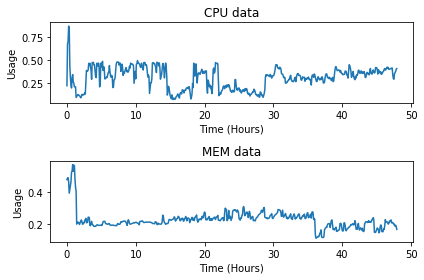

In [8]:
plt.subplot(211).plot([5*i/60 for i in range(2*24*60//5)], DATA['CPU'][0][:2*24*60//5])
plt.title('CPU data')
plt.xlabel('Time (Hours)')
plt.ylabel('Usage')
plt.subplot(212).plot([5*i/60 for i in range(2*24*60//5)], DATA['MEM'][0][:2*24*60//5])
plt.xlabel('Time (Hours)')
plt.ylabel('Usage')
plt.title('MEM data')

plt.tight_layout()
plt.show()
